# Recommender systems 

## Collaborative movie recommender

In [29]:
# load Movie lens data
import pandas as pd

# Read ratings
ratings = pd.read_csv('data/ratings.csv', sep=',', header=0, encoding='utf-8', names=['user_id','movie_id','rating','timestamp'])

# Read movies file
movies = pd.read_csv('data/movies.csv', sep=',', header=0, encoding='utf-8', names=['movie_id', 'title', 'genres'])
movies['genres'] = movies['genres'].str.split('|')

#tags = pd.read_csv('data/tags.csv', sep=',', header=0, encoding='utf-8', names=['user_id','movie_id','tag','timestamp'])

In [30]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [31]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [32]:
tags.head()

,user_id,movie_id,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [33]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

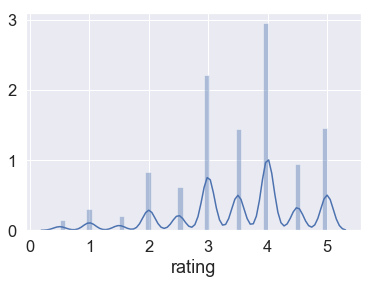

In [34]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [41]:
# Merge ratings and movies
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


### User based approach

### Item based approach

### Factorization approach

In [66]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV


# ratings from 0.5 to 5
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(movie_ratings[['user_id', 'movie_id', 'rating']],reader)

# Set params to check
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8905114929359774
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


## Content-based movie recommender

In [57]:
# merge movies and tags
movie_tags = pd.merge(movies, tags)
movie_tags.head()

,movie_id,title,genres,user_id,tag,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",336,pixar,1139045764
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",474,pixar,1137206825
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",567,fun,1525286013
3,2,Jumanji (1995),"[Adventure, Children, Fantasy]",62,fantasy,1528843929
4,2,Jumanji (1995),"[Adventure, Children, Fantasy]",62,magic board game,1528843932
